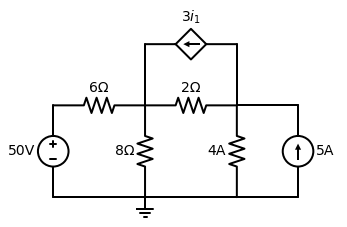

In [2]:
import schemdraw as schem
import schemdraw.elements as elm

d = schem.Drawing()

Line1 = d.add(elm.LINE, d='right')
d += elm.Line().right().length(3)
d += elm.SourceI().up().label(('5A'), loc='bottom')
d += elm.Line().left().length(2)
d.push()
d += elm.Resistor().down().label('4A')
d.pop()
d += elm.Line().up().length(2)
d += elm.SourceControlledI().left().label('$3i_1$')
d += elm.Line().down().length(2)
d.push()
d += elm.Resistor().label('2Ω').right()
d.pop()
d.push()
d += elm.Resistor().label('8Ω').down()
d.pop()
d += elm.Resistor().label('6Ω').left()
d += elm.SourceV().label('50V').down().reverse()
d += elm.Line().right()
d += elm.Ground()

d


In [1]:
from ipywidgets import FloatSlider, link, Button, Output, VBox
from ipysheet import sheet, cell, column, to_dataframe
from IPython.display import display, clear_output

sheet1 = sheet(rows=1, columns=5, column_headers=["R1", "R2", "R3", "R4", "V"])

R1 = FloatSlider(orientation='vertical')
R2 = FloatSlider(orientation='vertical')
R3 = FloatSlider(orientation='vertical')
R4 = FloatSlider(orientation='vertical')
V1 = FloatSlider(orientation="vertical")

column1 = cell(0, 0, R1)
column2 = cell(0, 1, R2)
column3 = cell(0, 2, R3)
column4 = cell(0, 3, R4)
column5 = cell(0, 4, V1)


sheet1

Sheet(cells=(Cell(column_end=0, column_start=0, row_end=0, row_start=0, type='widget', value=FloatSlider(value…

In [63]:


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# link((column1), (R1))


circuit = Circuit('Circuit with Controlled Current Voltage Source')
circuit.R(1, 2, 3, R1.value@u_Ω)
circuit.R(2, 3, circuit.gnd, R2.value@u_Ω)
circuit.R(3, 3, 4,            R3.value@u_Ω)
circuit.R(4, 4, circuit.gnd, R4.value@u_Ω)
circuit.V(1, 1, circuit.gnd, V1.value@u_V)
circuit.V('test', 1, 2,       0@u_V)
circuit.I(1, circuit.gnd, 4, 5@u_A)
circuit.F(1, 4, 3, 'Vtest', 5)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

button_send = Button(
                description='Simulate Circuit',
                tooltip='Simulate',
                style={'description_width': 'initial'}
            )


output = Output()
sheet2 = sheet(rows=1, columns=9, column_headers=["R1(Ω)", "R2(Ω)", "R3(Ω)", "R4(Ω)", "Node 1(V)", "Node 2(V)", "Node 3(V)", "Node 4(V)", "Node v1(A)"])

def on_button_clicked(event):
    with output:
        clear_output()
        with open('report.csv', 'a') as f:
            circuit_readings = []
            
            for node in analysis.nodes.values():
                circuit_readings.append('{:4.1f}'.format(float(node)))
#                 circuit_readings.append('Node {}: {:4.1f} V'.format(str(node), float(node)))
                
                print('Node {}: {:4.1f} V'.format(str(node), float(node))) 
            
            cell_a = cell(0, 0, R1.value)
            cell_b = cell(0, 1, R2.value)
            cell_c = cell(0, 2, R3.value)
            cell_d = cell(0, 3, R4.value)
            cell_e = cell(0, 4, circuit_readings[0])
            cell_f = cell(0, 5, circuit_readings[3])
            cell_g = cell(0, 6, circuit_readings[2])
            cell_h = cell(0, 7, circuit_readings[1])
           
            
            print(R1.value)
            
#             f.write(str(circuit_readings))
#             f.write('\n')
            for node in analysis.branches.values():
                circuit_readings.append('{:5.2f}'.format(float(node)))
                print('Node {}: {:5.2f} A'.format(str(node), float(node)))
            cell_i = cell(0, 8, circuit_readings[5])
            sheet2
            df3 = to_dataframe(sheet2)
            df3.to_csv('report.csv', mode='a', index=False, header=True)
            
               
            


button_send.on_click(on_button_clicked)



vbox_result = VBox([button_send, output, sheet2])


vbox_result



In [59]:
import json
import pandas as pd
from IPython.display import HTML

In [42]:
df = pd.read_csv('report.csv')
# df.drop(columns=['Unnamed: 0'], inplace=True)
json_data = df.to_json(orient='records')

In [43]:
flexmonster = {
    "container": "#pivot-container",
    "componentFolder": "https://cdn.flexmonster.com/",
    "width": "100%",
    "height": 430,
    "toolbar": True,
    "report": {
        "dataSource": {
            "type": "json",
            "data": json.loads(json_data) # decoding JSON
        },
    }
}

flexmonster_json_object = json.dumps(flexmonster)

In [52]:
def render_pivot_table(json_component):
    layout = '''
      <script src="https://cdn.flexmonster.com/flexmonster.js"></script>
      <h1>Flexmonster Integration with Jupyter Notebook</h1>
      <div id="pivot-container"></div>
      <script>
      new Flexmonster();
      </script>
      '''.format(json_component)
    return HTML(layout)

In [51]:
render_pivot_table(flexmonster_json_object)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
